<a href="https://colab.research.google.com/github/vivekvardhannali/predicting_the_failrate/blob/main/student_performance_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import zipfile
import io
import pandas as pd#creates nd arrays with much faster implementation than lists
import numpy as np#loading datasets,data manipulation etc
from sklearn.model_selection import train_test_split#
from sklearn.metrics import classification_report,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
zip_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
response=requests.get(zip_url)
if response.status_code == 200:
    with zipfile.ZipFile(io.BytesIO(response.content)) as thezip:
        with thezip.open('student-por.csv') as myfile:
            df_por = pd.read_csv(myfile, sep=';')#conversion of csv into dataframe
        with thezip.open('student-mat.csv') as myfile:
            df_mat = pd.read_csv(myfile, sep=';')
    df = pd.concat([df_por, df_mat], axis=0)
else:
    print("Failed to download the file")



In [ ]:
print(df.head())
print(df.describe())
print(df.isnull().sum())#isnull checks if there is any empty cell and sum accumulates all true values add it in one coloumn
print(df.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
               age         Medu         Fedu   traveltime    studytime  \
count  1044.00

Text(0, 0.5, 'Frequency')

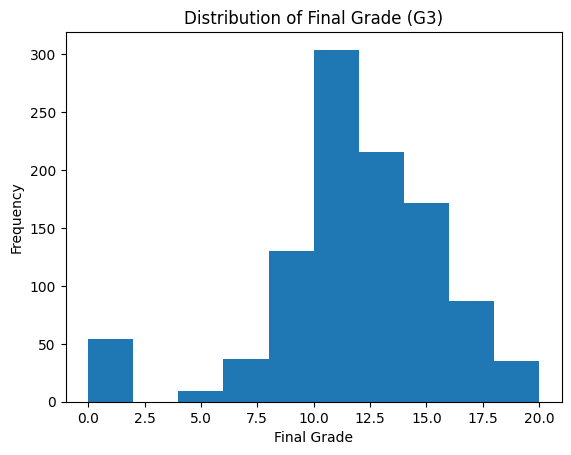

In [ ]:
plt.hist(df['G3'])
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#to check the pass percentage i gonna convert the g3 data into classification problem
#with 40% ie 8 marks
df['G3']=(df['G3']>=8).astype(int)
#handling missing values
df.fillna(df.mean(numeric_only=True),inplace=True)
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])



In [ ]:
#encoding
#use label encoder on any categorical variable and the method fit_transform in this does the job
# Encode binary categorical variables using LabelEncoder
binary_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus',
               'schoolsup', 'famsup', 'paid', 'activities',
               'nursery', 'higher', 'internet', 'romantic']
for var in binary_vars:
    le = LabelEncoder()
    df[var] = le.fit_transform(df[var])
# Encode nominal categorical variables using get_dummies
nominal_vars = ['Mjob', 'Fjob', 'reason', 'guardian']

df = pd.get_dummies(df, columns=nominal_vars, drop_first=True)
print(df.select_dtypes(include=['object']).columns)

Index([], dtype='object')


In [ ]:
# Normalize numeric values
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('G3')

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('G3')
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
# Preparing the data
X = df.drop(['G3'], axis=1)
y = df['G3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.select_dtypes(include=['object']).columns)


Index([], dtype='object')


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Model training using Random Forest
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)
# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

from sklearn.metrics import confusion_matrix
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Accuracy:  1.0
Confusion Matrix:
 [[209]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
